## Step 3: a2 Feature Analysis
##### Use this feature to build module of most common functions/graphs used
##### /utils/DataAggregation.py: Dataframe Convenience functions
##### /utils/AlgoUtils.py      : Algorithm Convenience functions
##### We will use this template and python modules to analyse other features

In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
sys.path.append('../utils')
import DataAggregation as da
import AlgoUtils as au
cmap_bold = ListedColormap(['#00FF00','#FF0000'])

In [2]:
dd = da.GetFrames("../data/device_failure.csv", "a2")

/home/vagrant/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/vagrant/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


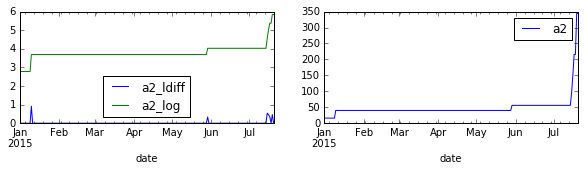

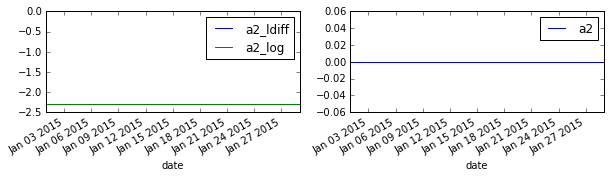

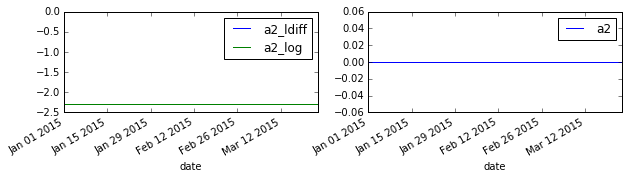

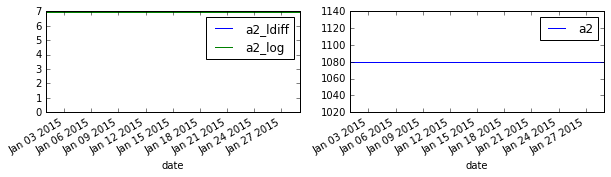

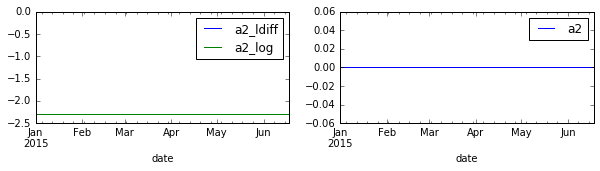

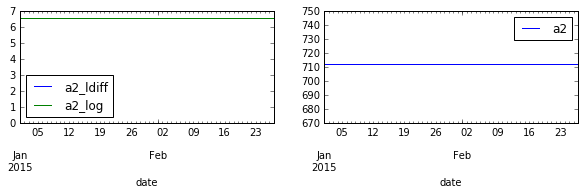

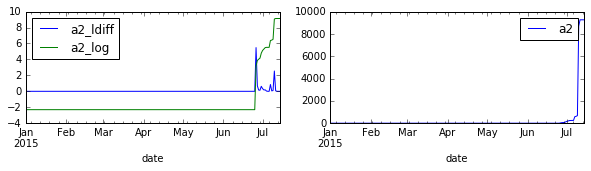

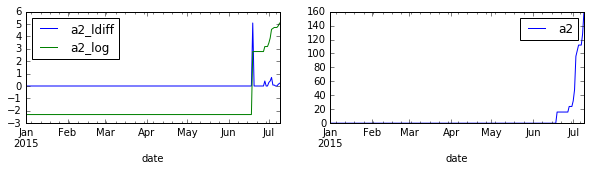

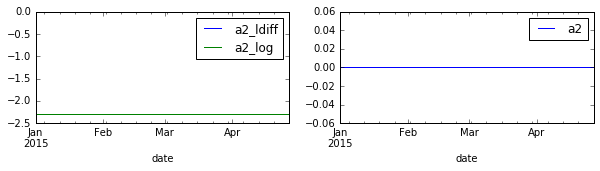

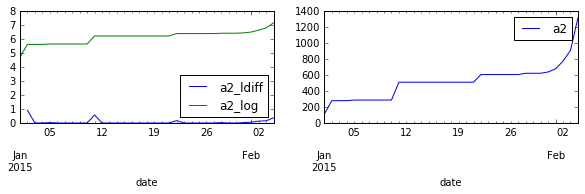

In [3]:
dd.plot_sample_history(dd.failed_devs["device"],10)

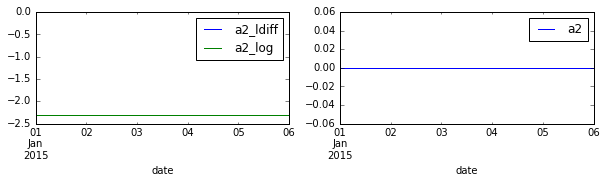

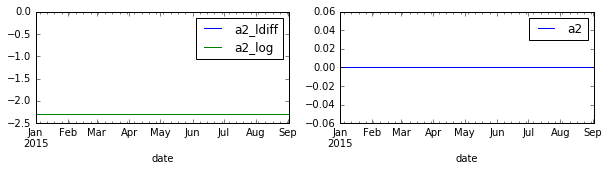

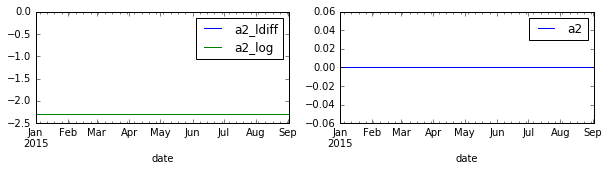

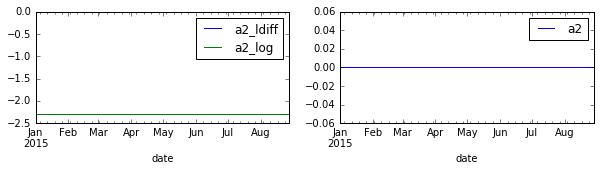

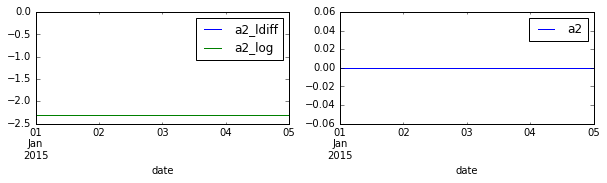

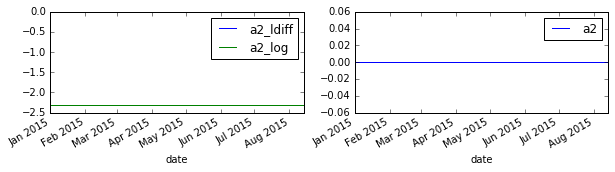

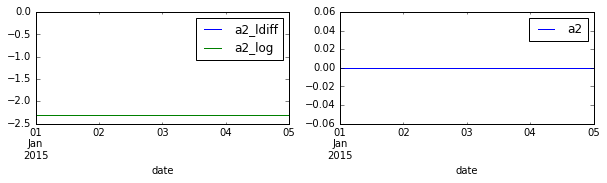

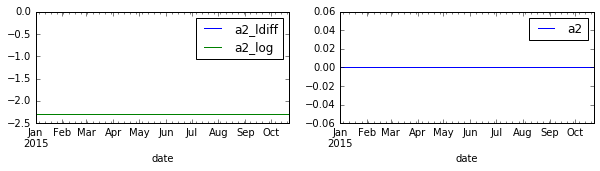

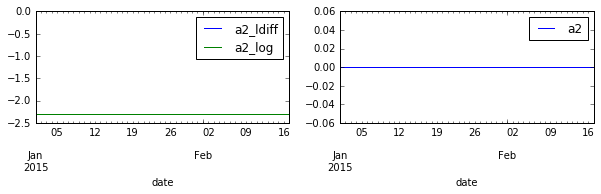

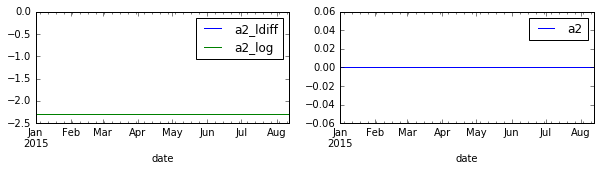

In [4]:
dd.plot_sample_history(dd.good_devs["device"],10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa889cabd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7faa88613f10>]], dtype=object)

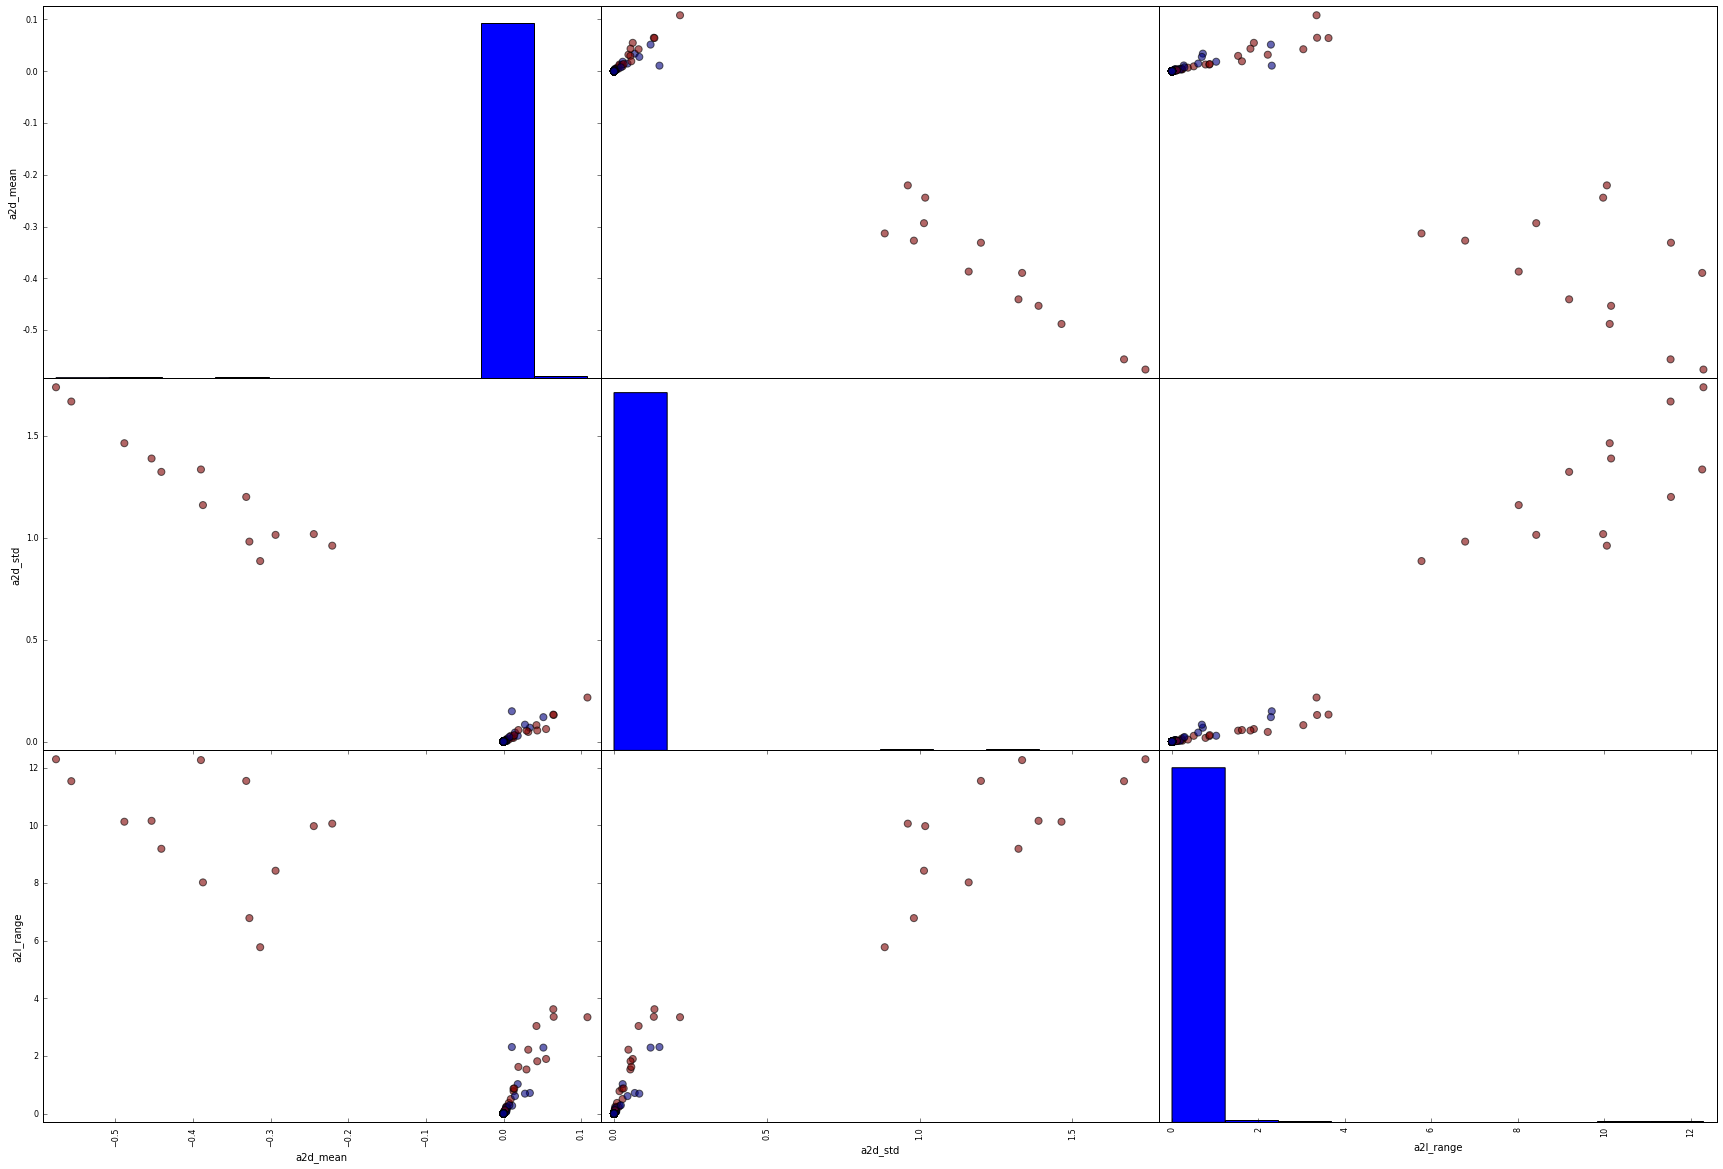

In [5]:
sfeature = dd.sfeature
fcols_tmp = [sfeature +"d_mean", sfeature +"d_std", sfeature +"l_range"]
df_sfeature = dd.df_sfeature
pd.scatter_matrix(df_sfeature[fcols_tmp], figsize=(30,20), s=200, c=df_sfeature["failure"], alpha=0.6)

#### Nice! See seperation between good and bad devices.

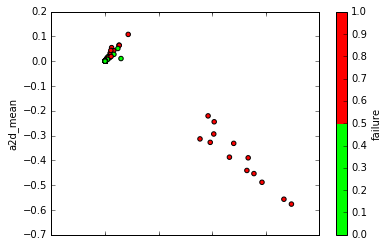

In [6]:
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"d_mean", c="failure", colormap=cmap_bold)

#### NICE!! a2d_std  vs a2d_mean
#### +ve correlation for good devices and -ve correlation for bad devices!
#### Quadratic Discriminant Analysis should really pick this up well

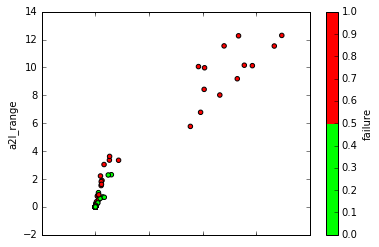

In [7]:
df_sfeature.plot(kind='scatter', x=sfeature+'d_std', y=sfeature+"l_range", c="failure", colormap=cmap_bold)

#### NICE!! a2d_std vs a2l_range
#### High correlation of bad devices and failure. Very good.
#### QDA or Linear Regression should pick this up

#### I really think QDA will come up on top, but try other algorithms just in case

In [8]:
algos_dd = {
    "LogisticRegression": {"C": 1e9},
    "LogisticRegressionB": {"C": 1e9, "class_weight":'balanced'},
    "KNeighborsClassifier": {"n_neighbors": 7},
    "LinearDiscriminantAnalysis": {},
    "QuadraticDiscriminantAnalysis": {}
}

fcols = ["d_mean:d_std:d_max:l_range",
         "d_mean:d_std:l_range",
         "d_std:l_range",
         "l_range",
         "d_std",
         "d_max"]
algos_str = ["LogisticRegression", 
             "LogisticRegressionB", 
             "KNeighborsClassifier",
             "LinearDiscriminantAnalysis",
             "QuadraticDiscriminantAnalysis"]

In [9]:
df_sfeature = dd.df_sfeature
sfeature = dd.sfeature
df_results = au.run_algo_analysis(df_sfeature, sfeature, fcols, algos_str, algos_dd)

----------
LogisticRegression:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.64
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.23
Cross-val-score(precision)= 0.91
Cross-val-score(f1)       = 0.91
----------
LogisticRegressionB:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.65
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.27
Cross-val-score(precision)= 0.78
Cross-val-score(f1)       = 0.78
----------
KNeighborsClassifier:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.65
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.23
Cross-val-score(precision)= 0.77
Cross-val-score(f1)       = 0.77
----------
LinearDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.67
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.20
Cross-val-score(precision)= 0.86
Cross-val-score(f1)       = 0.86
----------
QuadraticDiscriminantAnalysis:d_mean:d_std:d_max:l_range
Cross-val-score(roc_auc) = 0.66
Cross

/home/vagrant/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vagrant/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.23
Cross-val-score(precision)= 0.77
Cross-val-score(f1)       = 0.77
----------
LinearDiscriminantAnalysis:l_range
Cross-val-score(roc_auc) = 0.66
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.16
Cross-val-score(precision)= 0.87
Cross-val-score(f1)       = 0.87
----------
QuadraticDiscriminantAnalysis:l_range
Cross-val-score(roc_auc) = 0.63
Cross-val-score(accuracy) = 0.93
Cross-val-score(recall)   = 0.24
Cross-val-score(precision)= 0.85
Cross-val-score(f1)       = 0.85
----------
LogisticRegression:d_std
Cross-val-score(roc_auc) = 0.66
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.16
Cross-val-score(precision)= 0.75
Cross-val-score(f1)       = 0.75
----------
LogisticRegressionB:d_std
Cross-val-score(roc_auc) = 0.66
Cross-val-score(accuracy) = 0.92
Cross-val-score(recall)   = 0.27
Cross-val-score(precision)= 0.72
Cross-val-score(f1)       = 0.72
----------
KNeighborsClassifier:d_std
Cross

In [10]:
df_results

,fcols,algo,recall,precision,f1,roc_auc,accuracy
11,d_std:l_range,LogisticRegressionB,0.29,0.78,0.41,0.67,0.92
16,l_range,LogisticRegressionB,0.29,0.79,0.41,0.66,0.93
1,d_mean:d_std:d_max:l_range,LogisticRegressionB,0.27,0.78,0.39,0.65,0.93
6,d_mean:d_std:l_range,LogisticRegressionB,0.27,0.77,0.39,0.65,0.92
21,d_std,LogisticRegressionB,0.27,0.72,0.38,0.66,0.92
4,d_mean:d_std:d_max:l_range,QuadraticDiscriminantAnalysis,0.26,0.79,0.38,0.66,0.92
14,d_std:l_range,QuadraticDiscriminantAnalysis,0.25,0.85,0.38,0.65,0.93
9,d_mean:d_std:l_range,QuadraticDiscriminantAnalysis,0.25,0.83,0.37,0.65,0.93
19,l_range,QuadraticDiscriminantAnalysis,0.24,0.85,0.37,0.63,0.93
0,d_mean:d_std:d_max:l_range,LogisticRegression,0.23,0.91,0.35,0.64,0.93


### As expected, QuadraticDiscriminantAnalysis(QDA) (Row index 14 above) produces fairly precise results for with close enough recall rate.

### Lets see why Recall(Sensitivity) is so low

In [11]:
sfeature = dd.sfeature
algo_str = "QuadraticDiscriminantAnalysis"
fcols = [sfeature + x for x in "d_mean:d_std:l_range".split(":")]

In [12]:
analysisdf = au.do_clf_validate(df_sfeature, algo_str,algos_dd[algo_str], fcols, "failure")

Accuracy = 0.94
Confusion Matrix
[[267   4]
 [ 14   7]]
recall_sensitivity = 0.33
precision          = 0.64
f1                 = 0.44


In [16]:
analysisdf.head()

,a2d_mean,a2d_std,a2l_range,failure,y_pred
S1F0QY1C,0,0,0,0,0
W1F0W3GE,0,0,0,0,0
S1F0CT4F,0,0,0,0,0
S1F116J4,0,0,0,0,0
S1F0TQNP,0,0,0,0,0


In [19]:
mispredictdf = analysisdf[analysisdf["failure"] != analysisdf["y_pred"]]
mispredictdf.reset_index(inplace=True)
mispredictdf.columns = ["device"] + list(mispredictdf.columns[1:])

In [20]:
mispredictdf

,device,a2d_mean,a2d_std,a2l_range,failure,y_pred
0,Z1F1VQFY,0.000000,0.000000,0.000000,1,0
1,W1F0Z3KR,0.000000,0.000000,0.000000,1,0
2,W1F1BGAB,0.027591,0.082773,0.690037,0,1
3,S1F0S4T6,0.000000,0.000000,0.000000,1,0
4,Z1F0Q8RT,0.007463,0.022388,0.287335,0,1
5,Z1F0MRPJ,0.000000,0.000000,0.000000,1,0
6,Z1F130LH,0.000000,0.000000,0.000000,1,0
7,S1F0PJJW,0.000000,0.000000,0.000000,1,0
8,Z1F0P5D9,0.000000,0.000000,0.000000,1,0
9,W1F1B0KF,0.018282,0.028372,1.021474,0,1


In [21]:
mispredict_devs = pd.DataFrame(mispredictdf.device.unique())
mispredict_devs.columns = ["device"]

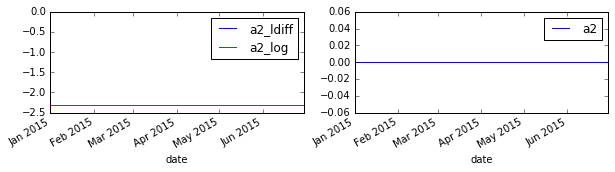

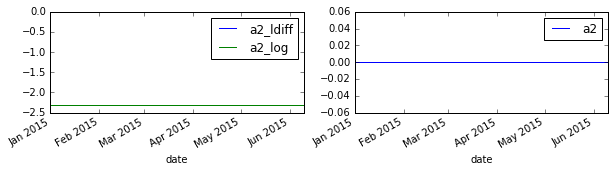

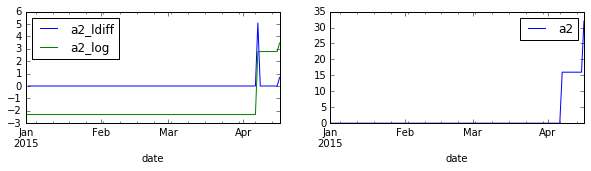

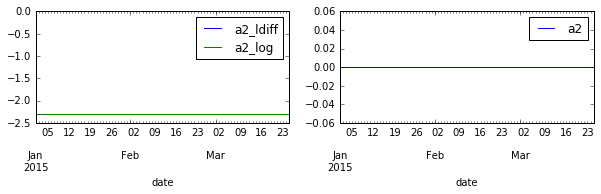

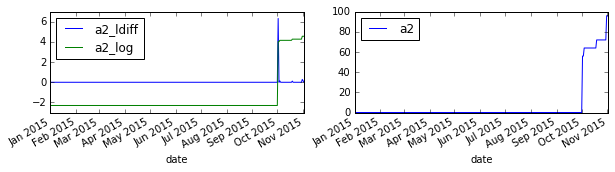

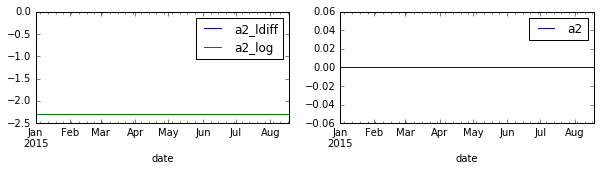

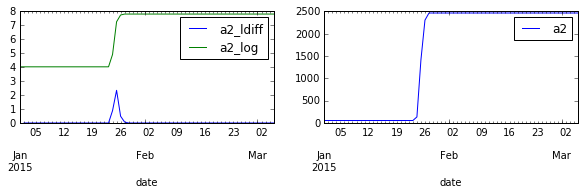

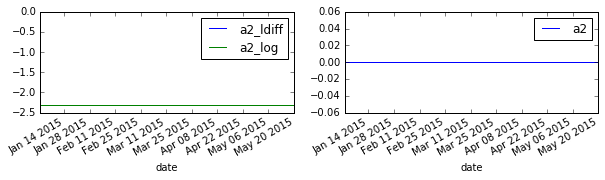

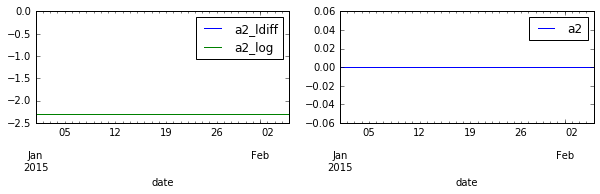

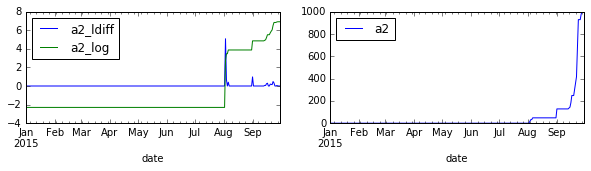

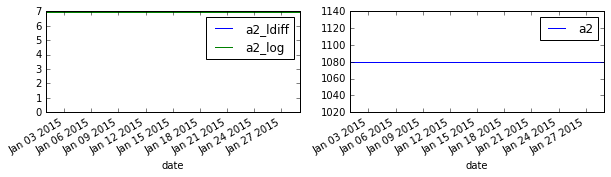

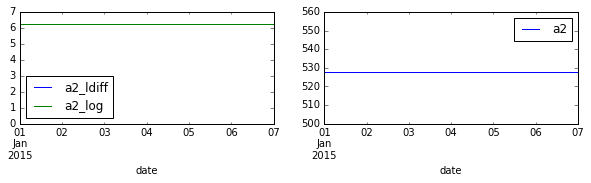

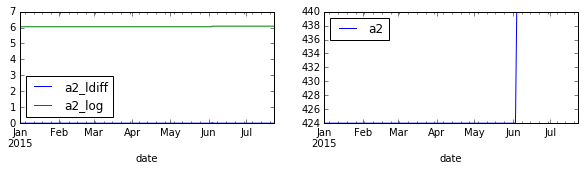

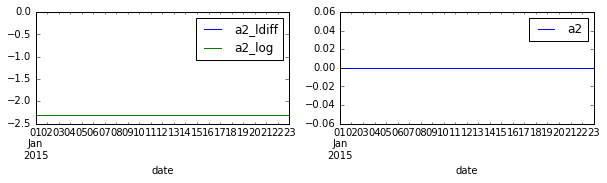

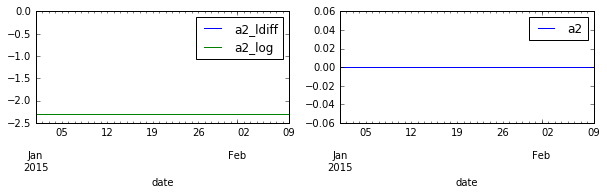

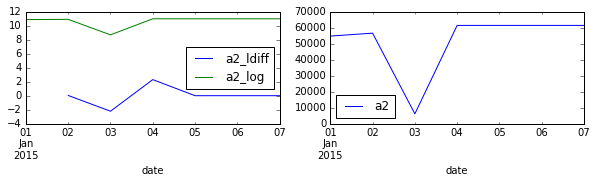

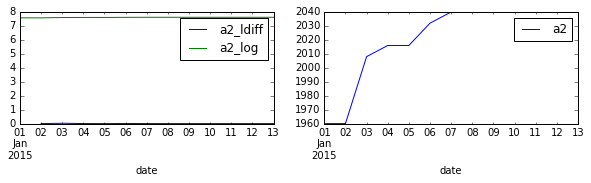

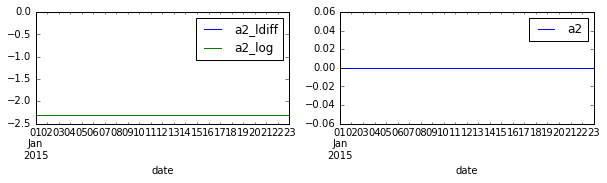

In [22]:
dd.plot_sample_history(mispredict_devs["device"],0)

## Summary
### This is really good. If there is signal in a2, we're capturing it
### Take even False Positives seriously!
### Reason recall rate is very low is because there is just no signal in a2 for these failed cases. Need to look for other features for failures